In [6]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.2 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vehicles.csv')

In [7]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

<Axes: >

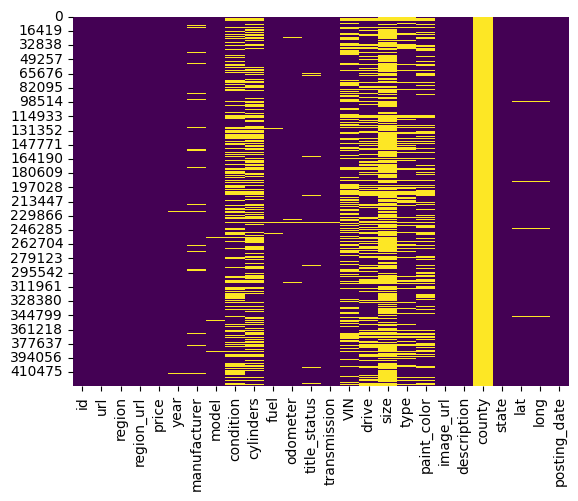

In [7]:
import seaborn as sns
#visualize the null values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [8]:
df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [9]:
#drop irrelevant columns
df.drop(['id', 'url', 'region_url', 'image_url', 'description', 'county', 'lat', 'long', 'VIN', ], axis=1, inplace=True)

In [10]:
df['drive'].unique()
#replace the null values in 'drive' with 'fwd'
df['drive'].fillna('fwd', inplace=True)

/tmp/ipykernel_1438/282329528.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['drive'].fillna('fwd', inplace=True)


In [11]:
df['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [12]:
df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [13]:
df.drop(columns=['size'], inplace=True)

In [14]:
df['paint_color'].unique()


array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [15]:
#replace the missing values in the 'paint_color' column with 'white'
df['paint_color'].fillna('white', inplace=True)

/tmp/ipykernel_1438/1942762165.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['paint_color'].fillna('white', inplace=True)


In [16]:
#the unique values for the cylinder column
df['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [17]:

#replace the missing values in the 'cylinders' column with 4
df['cylinders'].fillna('4 cylinders', inplace=True)

/tmp/ipykernel_1438/3568032965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna('4 cylinders', inplace=True)


<Axes: >

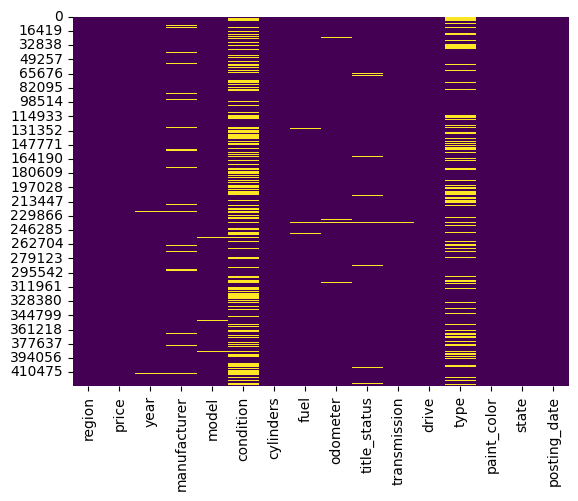

In [18]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [21]:
df.drop(columns=['condition', 'type'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   cylinders     426880 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         426880 non-null  object 
 11  paint_color   426880 non-null  object 
 12  state         426880 non-null  object 
 13  posting_date  426812 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


/tmp/ipykernel_1438/2115357678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title_status'].fillna(df['title_status'].mode()[0], inplace=True)
/tmp/ipykernel_1438/2115357678.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

<Axes: >

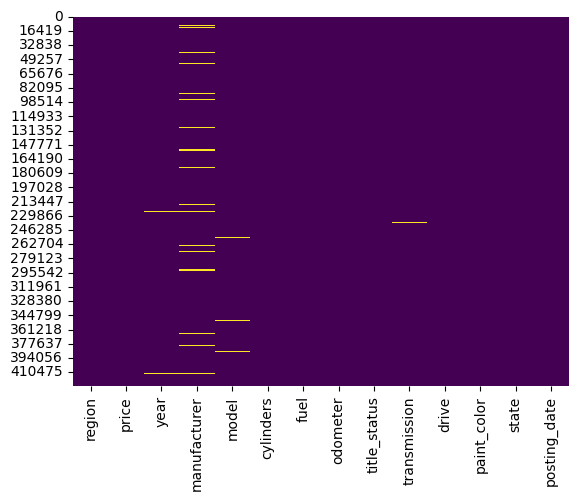

In [23]:
#fill with mode in 'title_status'
df['title_status'].fillna(df['title_status'].mode()[0], inplace=True)
#fill with mode in 'fuel'
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
#remplir l'odometer with the mean
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [24]:
#amount of NaN in the 'year' columns
df['year'].isnull().sum()

np.int64(1205)

In [25]:
#amount of NaN in the 'year' columns
df['year'].isnull().sum()

np.int64(1205)

In [26]:
#amount of each unique values in the 'cylinders' columns
df['fuel'].value_counts()

fuel
gas         359222
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [27]:
#the rows with the 'cylinders' column with 'other'
df[df['fuel'] == 'other']

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,paint_color,state,posting_date
40,auburn,30990,2016.0,chevrolet,colorado crew cab z71,4 cylinders,other,34940.0,clean,other,4wd,blue,al,2021-05-02T10:21:33-0500
41,auburn,27990,2014.0,toyota,tacoma access cab pickup,4 cylinders,other,17805.0,clean,other,fwd,red,al,2021-05-02T08:44:35-0500
43,auburn,33590,2014.0,toyota,tundra crewmax sr5 pickup,4 cylinders,other,55251.0,clean,other,fwd,red,al,2021-05-01T09:21:37-0500
44,auburn,30990,2019.0,ford,ranger supercrew xl pickup,4 cylinders,other,1834.0,clean,other,fwd,black,al,2021-05-01T09:21:34-0500
48,auburn,30590,2016.0,toyota,tacoma double cab sr5,4 cylinders,other,30176.0,clean,other,fwd,red,al,2021-04-30T11:21:17-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426819,wyoming,21990,2016.0,bmw,3 series 328i sedan 4d,4 cylinders,other,26599.0,clean,automatic,rwd,blue,wy,2021-04-06T03:30:27-0600
426861,wyoming,30990,2019.0,alfa-romeo,romeo giulia ti sedan 4d,4 cylinders,other,3883.0,clean,other,fwd,blue,wy,2021-04-05T03:20:24-0600
426865,wyoming,34590,2020.0,alfa-romeo,romeo giulia sedan 4d,4 cylinders,other,2498.0,clean,other,rwd,black,wy,2021-04-05T02:41:27-0600
426867,wyoming,28990,2018.0,jaguar,xe 25t prestige sedan 4d,4 cylinders,other,16841.0,clean,other,rwd,white,wy,2021-04-05T02:41:23-0600


In [28]:
#change the 'other' with 'rotatry engine' if fuel is other else rotary engine
df.loc[(df['cylinders'] == 'other') & (df['fuel'] == 'other'), 'cylinders'] = 'rotary engine'

In [29]:
#change 'other' in fuel to gas, voir commd df[df['fuel'] == 'other']
df['fuel'].replace('other', 'gas', inplace=True)


/tmp/ipykernel_1438/1983310002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel'].replace('other', 'gas', inplace=True)


In [30]:
#outliers, describe without the scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['price'].describe()

count       426880.00
mean         75199.03
std       12182282.17
min              0.00
25%           5900.00
50%          13950.00
75%          26485.75
max     3736928711.00
Name: price, dtype: float64

<Axes: xlabel='price'>

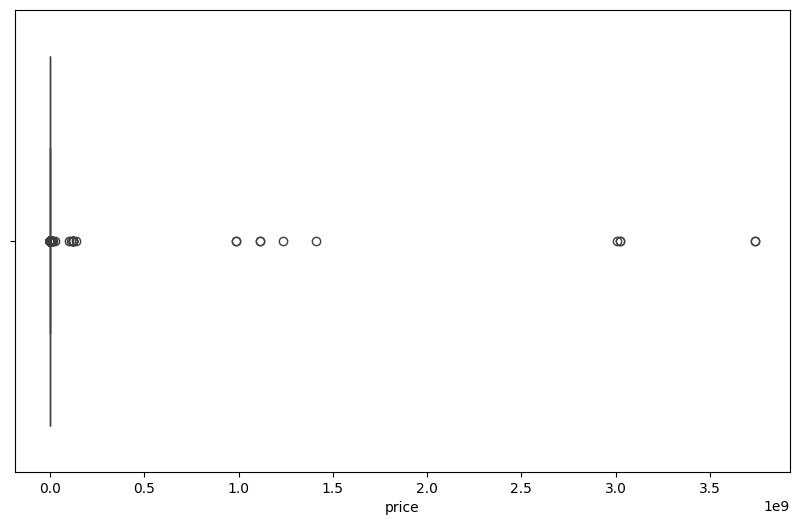

In [31]:
#boite à moustache pour les prix
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])

<Axes: xlabel='log_price'>

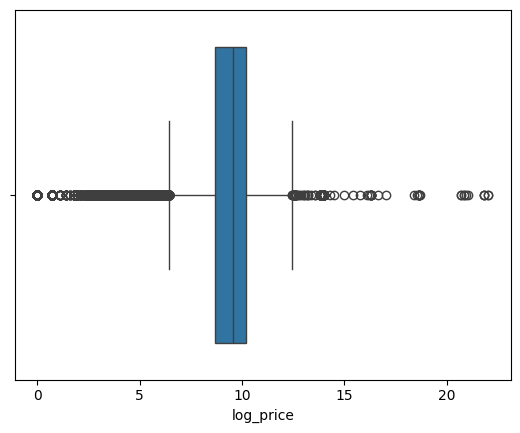

In [32]:
import numpy as np
df['log_price'] = np.log1p(df['price'])  # log1p handles 0 values safely
sns.boxplot(x=df['log_price'])


#serious problem with outliers, prices that are 0$ and one that are way larger >> 200 000$

In [33]:
below_500 = df[df['price'] < 500] #500$ ou 5000dh a reasonable price for a broken or a low car
len(below_500)

42094

In [34]:
len(below_500)*100/len(df)

9.860850824587706

In [35]:
above = df[df['price'] > 200000] #200000dh is a reasonable price for a high spec car
len(above)
len(above)*100/len(df)

0.029047976011994003

<Axes: xlabel='price', ylabel='Count'>

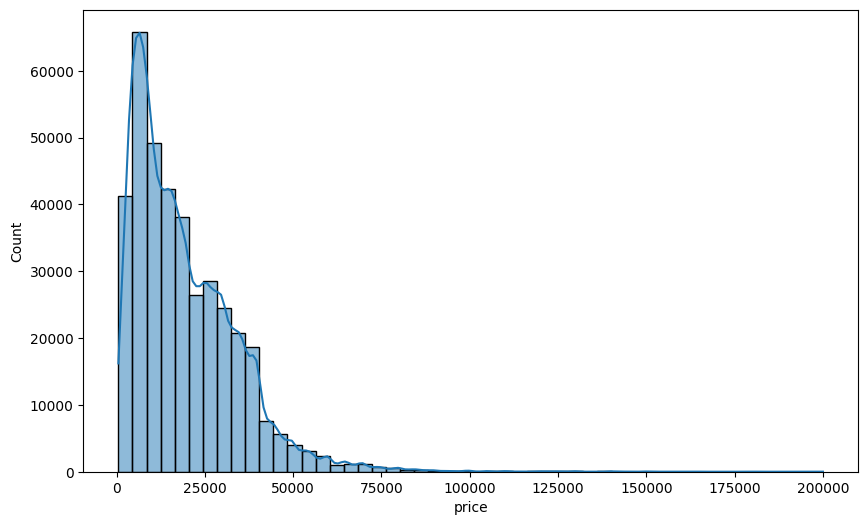

In [36]:
#drop the rows with price below 500 and above 200000
df = df[(df['price'] >= 500) & (df['price'] <= 200000)]
#reset the index
df.reset_index(drop=True, inplace=True)
#check the price again
df['price'].describe()
#visualize the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)

logic, la mojorité des voitures vont pas depasser 40 000$ ou 40M centieme

<Axes: xlabel='price'>

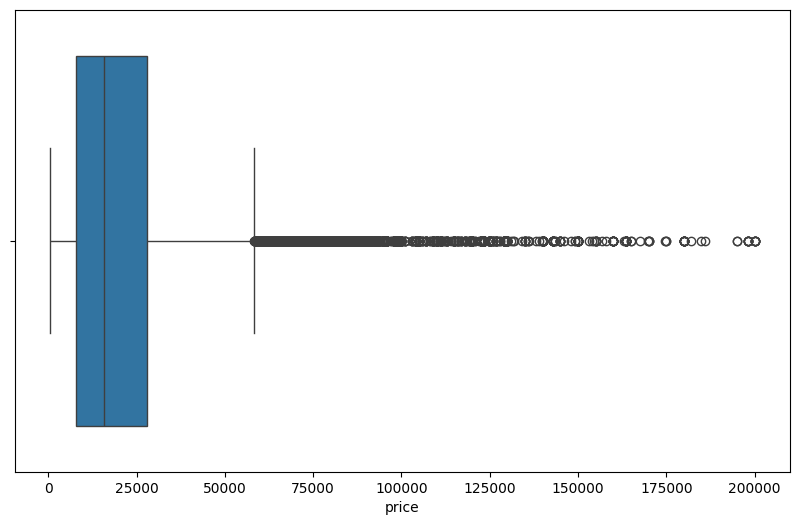

In [37]:
#boxplot of the price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])

les outliers dans notre cas reflètent le monde réels, la majorité des voitrures qui seront listé en ligne seront d'une moyenne vers une bad gamme, et la minorité reflétera des voiture de haute gammes

#classements et aggrégations selon différentes colonnes

In [38]:
#classements et aggrégations selon différentes colonnes
df.head()

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,paint_color,state,posting_date,log_price
0,prescott,6000,NaN,NaN,NaN,4 cylinders,gas,98043.33,clean,NaN,fwd,white,az,NaN,8.70
1,fayetteville,11900,NaN,NaN,NaN,4 cylinders,gas,98043.33,clean,NaN,fwd,white,ar,NaN,9.38
2,florida keys,21000,NaN,NaN,NaN,4 cylinders,gas,98043.33,clean,NaN,fwd,white,fl,NaN,9.95
3,worcester / central MA,1500,NaN,NaN,NaN,4 cylinders,gas,98043.33,clean,NaN,fwd,white,ma,NaN,7.31
4,greensboro,4900,NaN,NaN,NaN,4 cylinders,gas,98043.33,clean,NaN,fwd,white,nc,NaN,8.50


aggregation interressantes:
    analyse selon les regions
    analyse selon fuel
    analyse selon le drive train
    

In [39]:
#nombre des duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_1438/3375081296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [41]:
df.drop(columns=['log_price'], inplace=True)

KeyError: "['log_price'] not found in axis"

In [42]:
df.groupby('fuel')['price'].mean().sort_values(ascending=False)

fuel
diesel     34029.76
electric   26170.45
gas        18241.16
hybrid     15840.28
Name: price, dtype: float64

In [43]:
df.groupby('drive')['price'].mean().sort_values(ascending=False)

drive
4wd   24054.28
rwd   21307.67
fwd   16185.88
Name: price, dtype: float64

In [44]:
df.groupby('region')['price'].mean().sort_values(ascending=False).head(10)

region
imperial county           36226.36
logan                     33941.92
salt lake city            33724.20
east oregon               33562.86
olympic peninsula         33303.23
scottsbluff / panhandle   32502.30
moses lake                32355.94
pullman / moscow          31517.35
yuma                      31483.93
boone                     31451.54
Name: price, dtype: float64

<Axes: xlabel='odometer', ylabel='price'>

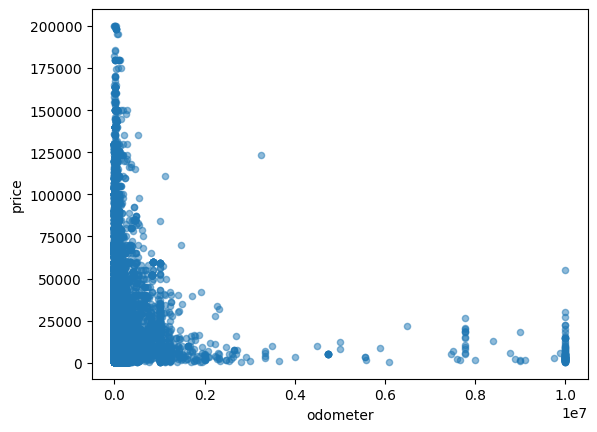

In [45]:
df[['odometer', 'price']].plot.scatter(x='odometer', y='price', alpha=0.5)

le graph met en évidence le fait que le prix et la distance parcourie par une voiture sont invéresement proportionnels 

In [46]:
df['price_per_km'] = df['price'] / df['odometer']
df.groupby('fuel')['price_per_km'].mean().sort_values(ascending=False)

/tmp/ipykernel_1438/2665008036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_km'] = df['price'] / df['odometer']


fuel
diesel     inf
electric   inf
gas        inf
hybrid     inf
Name: price_per_km, dtype: float64

In [47]:
df.groupby(['drive', 'fuel'])['price'].mean().sort_values(ascending=False)

drive  fuel    
4wd    electric   42791.84
       diesel     39348.88
rwd    electric   32623.34
fwd    diesel     28787.45
rwd    diesel     25827.91
4wd    hybrid     24544.79
rwd    hybrid     22078.13
4wd    gas        21939.50
rwd    gas        20840.46
fwd    electric   19342.21
       gas        15685.87
       hybrid     14525.82
Name: price, dtype: float64